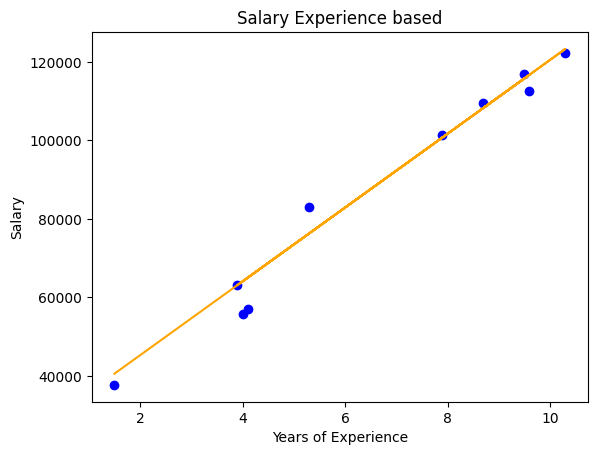

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Linear Regression
class LinearReg():
    
    def __init__(self, learning_rate, iterations ):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    #func for model training
    def fit(self, X, Y):
        #no of training examples, no of features
        self.no_train_example, self.no_features = X.shape
        self.theta = np.zeros(self.no_features)
        self.intercep = 0
        self.X = X
        self.Y = Y

        #gradient descent learning
        for _ in range(self.iterations):
            self.update_theta()

        return self

    def update_theta(self):
        prediction_set = self.predict(self.X)
        #calculate gradients 
        d_theta = -(2 * (self.X.T).dot(self.Y - prediction_set))/self.no_train_example
        d_inter = -(2 * np.sum(self.Y - prediction_set))/self.no_train_example

        #update weights
        self.theta = self.theta - self.learning_rate * d_theta
        self.intercep = self.intercep - self.learning_rate * d_inter

        return self


    def predict(self, X):
        return X.dot(self.theta) + self.intercep
    



#generate 2 data arrays for salary and for years_of_experiance
def main():
    data = pd.read_csv("Salary_Data.csv")
    X = data.iloc[:,:-1].values
    Y = data.iloc[:,1].values

    #Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
    
    #Model trainnig
    model = LinearReg(iterations=1000, learning_rate=0.01)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)

    #visualisation
    plt.scatter(X_test, Y_test, color="b")
    plt.plot(X_test, prediction, color="orange")
    plt.title("Salary Experience based")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.show()

main()